<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

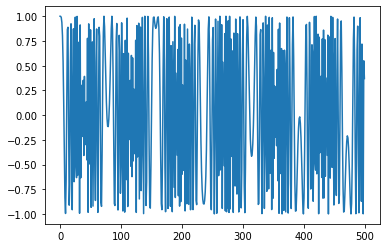

In [16]:
# make dataset
s = np.cos((0.2*np.arange(500))**2)
plt.plot(s)

In [17]:
T = 20
D =1
X =[]
Y = []
for i in range(len(s) - T):
  x = s[i:i+T]
  X.append(x)
  y = s[i+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # M X T
Y = np.array(Y)
print("X shape = ",X.shape, "Y shape is = ", Y.shape)

X shape =  (480, 20) Y shape is =  (480,)


In [18]:
X = X.reshape(-1, T, 1) # Make it N x T x D; the correct shape for LSTM

# constructing the LSTM model
i = Input(shape = (T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse',
              optimizer = Adam(lr=0.05),
)
xtrain = X[:-250 // 2]
ytrain = Y[:-250 // 2]

xtest = X[-250 // 2:]
ytest = Y[-250 // 2:]

r = model.fit(xtrain, ytrain, batch_size = 32,
              epochs = 200,
              validation_data =(xtest, ytest))

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 2s 42ms/step - loss: 0.5008 - val_loss: 0.4875
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4742 - val_loss: 0.4909
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4733 - val_loss: 0.5416
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 0.4472 - val_loss: 0.5267
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3875 - val_loss: 0.4159
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2100 - val_loss: 0.2398
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.1779 - val_loss: 0.2708
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1075 - val_loss: 0.2114
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0640 - val_loss: 0.0974
Epoch 10/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0444 - val_loss: 0.0723
Epoch 11/200
12/12 [

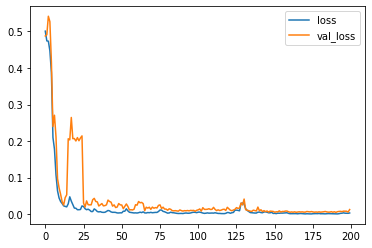

In [19]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


15/15 [==============================] - 0s 2ms/step


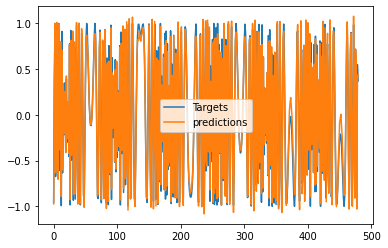

In [20]:
# Forcasting
p = model.predict(X) # use the whole data for prediction
p = p[:,0]
plt.plot(Y, label = 'Targets')
plt.plot(p, label = 'predictions')
plt.legend()


In [27]:
forecast = []
input = X[-250 // 2]
while len(forecast) < len(ytrain):
  pp = model.predict(input.reshape(1, T, 1))[0, 0]#reshape input to N x T x D
  forecast.append(pp)
  # make a new input with rhe latest forcast
  input = np.roll(input, -1) # shift data one step to left
  input[-1] = pp # place latest predicted value at last index


1/1 [==============================] - 0s 16ms/step


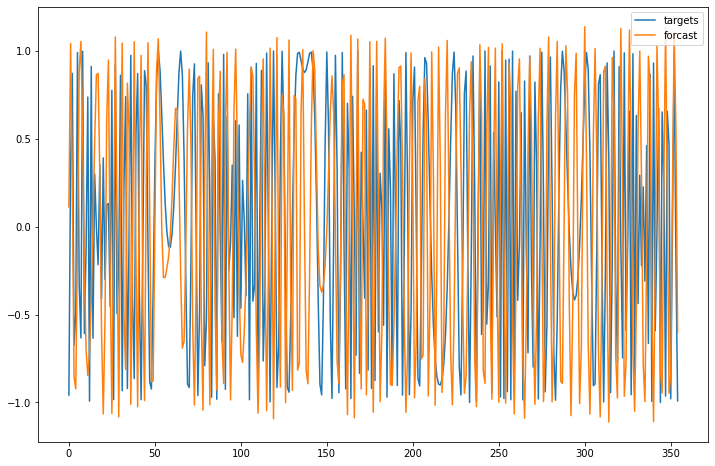

In [28]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot((ytrain), label = 'targets')
plt.plot(forecast, label = 'forcast')
plt.legend()
plt.show()